### Д/З №2: Найти примеры для противоречия normal, percentile, pivotal

In [1]:
import numpy as np
from scipy import stats

In [668]:
%%time
flag = False

while True:
    p1 = np.random.random()
    p2 = np.random.random()
    
#     a = np.random.exponential(scale=p1, size=10)
#     b = np.random.exponential(scale=p2, size=10)
#     a = np.random.geometric(p=p1, size=10)
#     b = np.random.geometric(p=p2, size=10)
    a,b = [[0.26681867, 0.01363516, 0.04770532, 0.16274795, 0.07608133,
       0.03002286, 0.06870122, 0.07417569, 0.09948619, 0.76075303],
                           [0.09943105, 0.49491981, 0.41428853, 0.41913064, 0.15214174,
       0.44616539, 0.40327831, 0.31272511, 0.25952023, 0.19641968]]
    
    cases = 0
    
    while True:
        pe_metric_ = np.mean(b) - np.mean(a)
        boot_metrics_ = generate_bootstrap_data(a, b)
        
        normal = get_ci_bootstrap_normal(boot_metrics_, pe_metric_)
        percentile = get_ci_bootstrap_percentile(boot_metrics_, pe_metric_)
#         pivotal = get_ci_bootstrap_pivotal(boot_metrics_, pe_metric_)
#         print(normal, percentile)

        normal_1 = ((normal[0] > 0) & (normal[1] > 0)) | ((normal[0] < 0) & (normal[1] < 0))
        normal_0 = ((normal[0] > 0) & (normal[1] < 0)) | ((normal[0] < 0) & (normal[1] > 0))
        percentile_0 = ((percentile[0] > 0) & (percentile[1] < 0)) | ((percentile[0] < 0) & (percentile[1] > 0))
        percentile_1 = ((percentile[0] > 0) & (percentile[1] > 0)) | ((percentile[0] < 0) & (percentile[1] < 0))
#         pivotal_0 = ((pivotal[0] > 0) & (pivotal[1] < 0)) | ((pivotal[0] < 0) & (pivotal[1] > 0))
#         pivotal_1 = ((pivotal[0] > 0) & (pivotal[1] > 0)) | ((pivotal[0] < 0) & (pivotal[1] < 0))
        
        if normal_1 & percentile_0:
#             print(cases)
            cases += 1
        else:
            if cases > 1000:
                print(cases)
                print(p1, p2)
                print(f'{a=}')
                print(f'{b=}')
#             if cases > 10:
#                 print('>10')
#             if cases > 0:
#                 print('>20')
            cases = 0
            break
            
        if cases == 10000:
            print('normal_1__percentile_0')
            print(p1, p2)
            print(f'{a=}')
            print(f'{b=}')
            flag = True
            break
    if flag:
        break

normal_1__percentile_0
0.28275353697027705 0.9366844899357605
a=[0.26681867, 0.01363516, 0.04770532, 0.16274795, 0.07608133, 0.03002286, 0.06870122, 0.07417569, 0.09948619, 0.76075303]
b=[0.09943105, 0.49491981, 0.41428853, 0.41913064, 0.15214174, 0.44616539, 0.40327831, 0.31272511, 0.25952023, 0.19641968]
CPU times: user 34.1 s, sys: 1.34 s, total: 35.4 s
Wall time: 35.4 s


### Д/З №3: Стратификация

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

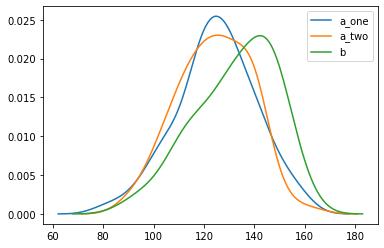

In [167]:
a_one, a_two, b = get_data(DATA, EFFECT, SAMPLE_SIZE)

kde_first = sm.nonparametric.KDEUnivariate(a_one[:,1])
kde_first.fit()
support_first, density_first = kde_first.support, kde_first.density
plt.plot(support_first, density_first, label='a_one')

kde_second = sm.nonparametric.KDEUnivariate(a_two[:,1])
kde_second.fit()
support_second, density_second = kde_second.support, kde_second.density
plt.plot(support_second, density_second, label='a_two')

kde_third = sm.nonparametric.KDEUnivariate(b[:,1])
kde_third.fit()
support_third, density_third = kde_third.support, kde_third.density
plt.plot(support_third, density_third, label='b')

plt.legend()
plt.plot(loc='upper right')
plt.show()

In [168]:
check_test(a_one, a_two), check_test(a_one, b)

(0, 1)

### Д/З №4: Метрики

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [145]:
df = pd.read_csv('5/df_elevator_logs.csv')

- если человек дождался лифта, то T = t2 - t1, где t2 - время прибытия на целевой этаж, а t1 - время вызова лифта.
- если человек не дождался лифта, то T = 2 * (t2 - t1), где t2 - время когда решил пойти пешком, t1 - время вызова лифта.


У нас есть табличка с логами лифта, в которой есть следующие атрибуты:
- time - время в секундах.
- action - состояние лифта в следующие 10 секунд. OPEN - стоит открытый, UP - едет вверх, DOWN - едет вниз.
- user_out - количество вышедших человек
- user_in - количество вошедших человек
- user_total - количество человек в лифте
- floor - текущий этаж
- calls - список вызовов. Вызов описывается парой значений - время вызова и этаж, на который был вызван лифт.
- orders - список заказов, на какие этажи нажимали пользователи, зашедшие в лифт. Аналогично содержит список пар - 
время заказа и целевой этаж.

In [155]:
df.iloc[70:80]

,time,action,user_out,user_in,user_total,floor,calls,orders
70,700,up,0,0,0,5,"[(660, 8), (680, 2), (700, 7)]",[]
71,710,up,0,0,0,6,"[(660, 8), (680, 2), (700, 7)]",[]
72,720,open,0,1,1,7,"[(660, 8), (680, 2)]","[(720, 5)]"
73,730,up,0,0,1,7,"[(660, 8), (680, 2)]","[(720, 5)]"
74,740,open,0,3,4,8,"[(680, 2)]","[(720, 5), (740, 1), (740, 6)]"
75,750,down,0,0,4,8,"[(680, 2)]","[(720, 5), (740, 1), (740, 6)]"
76,760,down,0,0,4,7,"[(680, 2)]","[(720, 5), (740, 1), (740, 6)]"
77,770,open,1,0,3,6,"[(680, 2)]","[(720, 5), (740, 1)]"
78,780,down,0,0,3,6,"[(680, 2), (780, 1)]","[(720, 5), (740, 1)]"
79,790,open,2,0,1,5,"[(680, 2), (780, 1), (790, 10)]","[(740, 1)]"


In [266]:
from collections import defaultdict

previous_calls = set()
previous_orders = set()
in_elevator_start_time = []
calls_waitings = defaultdict(int)
orders_waitings = defaultdict(int)
metric = []

for it in df.iterrows():
    time = it[1]['time']
    action = it[1]['action']
    floor = it[1]['floor']
    calls = set(eval(it[1]['calls']))
    orders = set(eval(it[1]['orders']))
    
    # обновляем счетчики времени ожидания и поездки
    for call in calls:
        calls_waitings[call] += 10
    for order in orders:
        orders_waitings[order] += 10
    
    # пропавшие вызовы
    removed_calls = previous_calls - calls

    for removed in removed_calls:
        # не успели на вызов
        if floor != removed[1]:
            waited_time = 2 * (time - removed[0])
            metric.append(waited_time)
        # успели на вызов
        elif (floor == removed[1]) and (action == 'open'):
            in_elevator_start_time.append(removed[0])

    # выполненные заказы
    completed_orders = previous_orders - orders
    
    for completed in completed_orders:
        # пассажир доехал до цели (допущение о FIFO, как в queue)
        if (completed[1] == floor) and (action == 'open'):
            if len(in_elevator_start_time) > 0:
                start_time = in_elevator_start_time.pop(0)
            else:
                start_time = completed[0]
            waited_and_ride_time = time - start_time
            metric.append(waited_and_ride_time)
        
    previous_calls = calls
    previous_orders = orders
    
limit_calls_waiting = np.percentile(np.array(list(calls_waitings.values())), 98)
limit_orders_waiting = np.percentile(np.array(list(orders_waitings.values())), 98)
limit = limit_calls_waiting + limit_orders_waiting
metric_ajusted = [x for x in metric if x < limit]

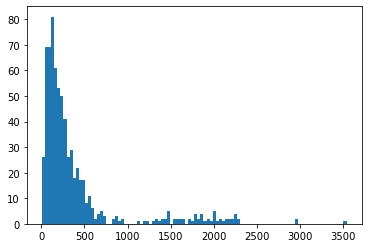

In [267]:
plt.hist(metric, bins=100)
plt.show()

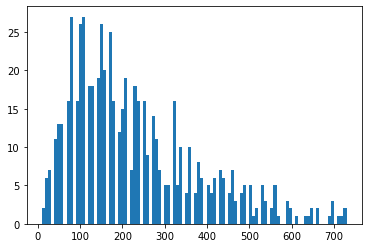

In [268]:
plt.hist(metric_ajusted, bins=100)
plt.show()

### Д/З №5: CUPED

In [288]:
import time
from tqdm import tqdm

import numpy as np
from scipy import stats

EFFECT = 5
SAMPLE_SIZE = 100

# --------------------------- Добавлено ---------------------------

from scipy.stats import ttest_ind
from sklearn.linear_model import RidgeCV

np.random.seed(42)

def calculate_theta(y_control, y_pilot, y_control_cov, y_pilot_cov) -> float:
    """Вычисляем Theta.
    
    y_control - значения метрики во время пилота на контрольной группе
    y_pilot - значения метрики во время пилота на пилотной группе
    y_control_cov - значения ковариант на контрольной группе
    y_pilot_cov - значения ковариант на пилотной группе
    """
    y = np.hstack([y_control, y_pilot])
    y_cov = np.hstack([y_control_cov, y_pilot_cov])
    covariance = np.cov(y_cov, y)[0, 1]
    variance = y_cov.var()
    theta = covariance / variance
    return theta

def get_ml_predicted_covariants(data_control: np.array, data_pilot: np.array) -> tuple:
    """
    Обучение регрессии на 8-ую неделю по признакам 1-7 недель
    Ковариант - прогноз моделью 9-ой недели по признакам 2-8 недель
    """
    alphas=[1e-2, 1e-1, 1, 5, 10, 20]
    model = RidgeCV(normalize=True)
    
    data = np.vstack([data_control, data_pilot])
    
    model.fit(data[:, :7], data[:, -2])

    data_control_predicted = model.predict(data_control[:, 1:8])
    data_pilot_predicted = model.predict(data_pilot[:, 1:8])
    
    theta = calculate_theta(
        data_control[:, 8], data_pilot[:, 8],
        data_control_predicted, data_pilot_predicted
    )

    data_control_cv = data_control[:, 8] - theta * data_control_predicted
    data_pilot_cv = data_pilot[:, 8] - theta * data_pilot_predicted
    
    return (data_control_cv, data_pilot_cv)

# ----------------------------------------------------------------

def get_data(effect, sample_size):
    """Возвращает данные для АА и АБ теста.

    return: a_one, a_two, b
        - матрицы размера (sample_size, 9),
        первые 8 столбцов содержат исторические значения метрики,
        последний столбец содержит значение метрики во время эксперимента.
    """
    list_data = []
    for _ in range(3):
        means = np.random.normal(100, 10, (sample_size, 1))
        trends = np.random.uniform(-10, 10, (sample_size, 1))
        noise = np.random.normal(0, 7.5, (sample_size, 9))
        list_data.append(
            means
            + trends * np.arange(-4, 5).reshape(1, -1)
            + noise
        )
    a_one, a_two, b = list_data
    b[:, -1] += effect
    return a_one, a_two, b


def check_test(data_control: np.array, data_pilot: np.array) -> int:
    """Проверяет наличие значимого эффекта.

    data_control - матрица с данными контрольной группы.
        size = (sample_size, 9),
        в последнем столбце значения метрики во время эксперимента,
        первые 8 столбцов содержат значения метрики до эксперимента.
    data_pilot - матрица с данными экспериментальной группы.
        size = (sample_size, 9),
        в последнем столбце значения метрики во время эксперимента,
        первые 8 столбцов содержат значения метрики до эксперимента.

    return: 0 - если эффекта нет, 1 - если эффект есть
    """
    data_control_cv, data_pilot_cv = get_ml_predicted_covariants(data_control, data_pilot)

    _, pvalue_cuped = ttest_ind(data_control_cv, data_pilot_cv)

    return int(pvalue_cuped < 0.05)


def main():
    for _ in range(10):
        a_one, a_two, b = get_data(EFFECT, SAMPLE_SIZE)
        res = check_test(a_one.copy(), a_two.copy())
        assert res in [0, 1], f'Функция check_test вернула не 0 или 1, а "{res}"'
        res = check_test(a_one.copy(), b.copy())
        assert res in [0, 1], f'Функция check_test вернула не 0 или 1, а "{res}"'

    n_iter = 10000
    max_time = 60 * n_iter / 1000
    count_tp = 0
    count_fp = 0
    t1 = time.time()
    for idx in tqdm(range(n_iter)):
        a_one, a_two, b = get_data(EFFECT, SAMPLE_SIZE)
        count_fp += check_test(a_one.copy(), a_two.copy())
        count_tp += check_test(a_one.copy(), b.copy())
        t2 = time.time()
        if t2 - t1 > max_time:
            print('Долго считает! На 1000 ААБ экспериментов более 1 минуты.')
            print(f'Успел {idx} из {n_iter}.')
            break
    else:
        print(f'Время на оценку 1000 ААБ экспериментов: {(t2 - t1) / n_iter * 1000:0.2f} сек')
    your_money = count_tp - count_fp
    max_money = n_iter
    part_money = your_money / max_money
    score_ = int(np.ceil((part_money - 0.63) / 0.03))
    score = np.clip(score_, 0, 10)
    print(f'part_money = {part_money}')
    print(f'score = {score}')

In [289]:
main()

100%|██████████| 10000/10000 [00:32<00:00, 310.63it/s]

Время на оценку 1000 ААБ экспериментов: 3.22 сек
part_money = 0.9034
score = 10


### Д/З №7: Множестенные гипотезы

In [2]:
"""Домашнее задание.

Нужно написать функцию для оценки множества взаимоисключающих экспериментов - check_test.
Взаимоисключающие эксперименты означают, что мы можем выбрать только один вариант или
отказаться от изменений вовсе.

На вход функции подаются данные контрольной и экспериментальной групп множества независимых
экспериментов, их количество может меняться от 5 до 20. Функция должна вернуть номер эксперимента,
который рекомендуется к внедрению, то есть в нём должны быть найдены значимые ПОЛОЖИТЕЛЬНЫЕ изменения.
Если значимых улучшений не обнаружено, то функция возвращает -1.

Оценка качества.
Будем считать, что за каждый найденный реальный эффект мы получаем 1 единицу денег (TP),
а за каждое неверно внедрённое изменение теряем 1 единицу денег (FP).
Всего будет проведено N аа и аб экспериментов, значит максимальный "выигрыш" равен N.
Далее посчитаем долю полученного выигрыша от максимального: P = (TP - FP) / N.
Оценка будет определяться по формуле:
score_ = int(np.ceil((P - 0.48) / 0.03))
score = np.clip(score_, 0, 10)

Обратите внимание на скорость работы функции. В коде есть ограничение по времени.
Чтобы все тесты успели пройти проверку, нужно чтобы 1000 ААБ экспериментов оценивалось не более 1 минуты.
Скорость работы можно проверить в Colab'е https://colab.research.google.com .

Проверка будет осуществляться по 10_000 ААБ экспериментам аналогичным кодом.
"""

from copy import deepcopy
import time
from tqdm import tqdm

import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests


EFFECT = 5
SAMPLE_SIZE = 100


def get_data(count_experiment, effect, sample_size):
    """Возвращает данные для АА и АБ теста.

    return: data_aa, data_ab, experiment_with_effect
        - данные для АА и АБ экспериментов.
    """
    data_aa = []
    for _ in range(count_experiment):
        data_aa.append({
            'control': np.random.normal(100, 10, sample_size),
            'pilot': np.random.normal(100, 10, sample_size)
        })

    count_negative = 3
    neg_effects = np.random.uniform(-effect, 0, count_negative)
    neg_indexes = np.random.randint(0, count_experiment, count_negative)
    for neg_effect, neg_index in zip(neg_effects, neg_indexes):
        data_aa[neg_index] = {
            'control': np.random.normal(100, 10, sample_size),
            'pilot': np.random.normal(100 + neg_effect, 10, sample_size)
        }

    data_ab = deepcopy(data_aa)
    experiment_with_effect = np.random.randint(0, count_experiment)
    data_ab[experiment_with_effect] = {
        'control': np.random.normal(100, 10, sample_size),
        'pilot': np.random.normal(100 + effect, 10, sample_size)
    }
    return data_aa, data_ab, experiment_with_effect


def check_test(data: list) -> int:
    """Проверяет наличие значимого эффекта.

    data - список с данными экспериментов, каждый элемент - словарь со значениями метрики
        в контрольной и экспериментальной группах.
        Пример с двумя экспериментами: [
            {'control': np.array([1, 2, 3]), 'pilot': np.array([7, 5, 6])},
            {'control': np.array([2, 2, 1]), 'pilot': np.array([3, 6, 5])},
        ]

    return:
        если положительного эффекта нет: -1;
        если положительный эффект есть, возвращает номер эксперимента рекомендуемого для внедрения
            из диапазона [0, len(data)-1].
    """
    # <YOUR_CODE_HERE>
    pvalues = np.array([])
    diffs = np.array([])
    
    for data_dict in data:
        control, pilot = data_dict['control'], data_dict['pilot']
        _, pvalue = ttest_ind(control, pilot)
        pvalues = np.append(pvalues, pvalue)
        diffs = np.append(diffs, np.mean(pilot) - np.mean(control))

    # изменим стандартный alpha = 0.05 на 0.10, чтобы сделать детекцию эффектов менее строгой
    res_bonferroni = multipletests(pvalues, alpha=0.1, method='bonferroni')[0]
    results = zip(pvalues, res_bonferroni, diffs)

    # учитываем только эффект > 0, находим индекс эксперимента с минимальным pvalue - самый заметный эффект
    if any(res_bonferroni):
        positive_effect_indices = np.where((diffs > 0) & (res_bonferroni == True))[0]
        positive_effect_pvalues = pvalues[positive_effect_indices]

        if len(positive_effect_pvalues) > 0:
            min_p_index_relative = np.argmin(positive_effect_pvalues)
            min_p_index_absolute = positive_effect_indices[min_p_index_relative]
            return min_p_index_absolute

    return -1


def main():
    count_experiment_ = 10
    for _ in range(10):
        data_aa, data_ab, _ = get_data(count_experiment_, EFFECT, SAMPLE_SIZE)
        for data in [data_aa, data_ab]:
            res = check_test(data)
            msg = f'Функция check_test вернула значение не из диапазона [-1, count_experiment_ - 1], а "{res}"'
            assert res in range(-1, count_experiment_), msg

    n_iter = 10000
    max_time = 60 * n_iter / 1000
    count_tp = 0
    count_fp = 0
    array_count_experiment = np.random.randint(5, 21, n_iter)
    t1 = time.time()
    for idx, count_experiment in tqdm(enumerate(array_count_experiment)):
        data_aa, data_ab, experiment_with_effect = get_data(count_experiment, EFFECT, SAMPLE_SIZE)
        res_aa = check_test(data_aa)
        count_fp += res_aa != -1
        res_ab = check_test(data_ab)
        count_fp += (res_ab != -1) and (res_ab != experiment_with_effect)
        count_tp += res_ab == experiment_with_effect
        t2 = time.time()
        if t2 - t1 > max_time:
            print('Долго считает! На 1000 ААБ экспериментов более 1 минут.')
            print(f'Успел {idx} из {n_iter}.')
            break
    else:
        print(f'Время на оценку 1000 ААБ экспериментов: {(t2 - t1) / n_iter * 1000:0.2f} сек')

    your_money = count_tp - count_fp
    max_money = n_iter
    part_money = your_money / max_money
    score_ = int(np.ceil((part_money - 0.48) / 0.03))
    score = np.clip(score_, 0, 10)
    print(f'part_money = {part_money}')
    print(f'score = {score}')

In [3]:
main()

10000it [01:11, 140.02it/s]

Время на оценку 1000 ААБ экспериментов: 7.14 сек
part_money = 0.7618
score = 10


### Д/З №8: Последовательное тестирование

In [9]:
import time
from tqdm import tqdm

import numpy as np
from scipy import stats

EFFECT = 3
SAMPLE_SIZE = 210
MEAN = 100
STD = 10

def get_data(effect, sample_size, period):
    """Возвращает данные эксперимента.

    return: control, pilot
    """
    control = np.random.normal(100, 10, sample_size)
    pilot = np.random.normal(100 + effect, 10, sample_size)
    list_data = [control, pilot]
    for idx, data in enumerate(list_data):
        sort_type = np.random.choice(['asc', 'desc', 'none'])
        if sort_type == 'none':
            continue
        matrix = data.reshape(sample_size // period, period)
        matrix.sort(axis=1)
        if sort_type == 'desc':
            matrix = np.flip(matrix, axis=1)
        sort_data = matrix.ravel()
        shift = np.random.randint(0, period)
        shift_data = np.hstack((sort_data[shift:], sort_data[:shift],))
        shuffle_indexes = np.random.randint(0, sample_size, (5, 2,))
        for i, j in shuffle_indexes:
            shift_data[i], shift_data[j] = shift_data[j], shift_data[i]
        list_data[idx] = shift_data
    return list_data


class TestChecker:
    def __init__(self, period: int):
        """Класс для проверки гипотез при постепенном получении данных.

        period - в данных возможна периодичность с таким периодом.
        """
        # <YOUR_CODE_HERE>
        self.period = period
        self.pilot_sum = 0
        self.control_sum = 0
        self.n = 0
        self.thetha_1 = EFFECT
        self.std = STD
        self.fraction = self.thetha_1 / (2 * self.std ** 2)
        self.alpha = 0.05
        self.beta = 0.2
        self.lower_bound = np.log(self.beta / (1 - self.alpha))
        self.upper_bound = np.log((1 - self.beta) / self.alpha)
        self.last_log_lambda = None

    def add_data(self, control_value: float, pilot_value: float) -> float:
        """Принимает решение при добавлении данных.
        
        control_value, pilot_value - значения метрики новых измерений
        
        return: принимаем решение или продолжаем эксперимент
            0 - говорим, что эффекта нет
            0.5 - данных недостаточно для принятия решения
            1 - говорим, что эффект есть
        """
        # <YOUR_CODE_HERE>
        self.n += 1
        self.control_sum += control_value
        self.pilot_sum += pilot_value
        
        # Принимаем решение через каждый батч размера period
        if self.n % self.period != 0:
            return 0.5
        else:
            # Проверяем гипотезу о равенстве средних
            delta = (self.pilot_sum - self.control_sum) / self.n
            log_lambda = self.n * self.fraction * (delta - self.thetha_1 / 2)
            self.last_log_lambda = log_lambda
            
            if log_lambda < self.lower_bound:
                return 0.
            elif log_lambda > self.upper_bound:
                return 1.
            else:
                return 0.5

    def make_decision(self) -> float:
        """Принимает решение по имеющимся данным.

        return: принимем решение
            0 - говорим, что эффекта нет
            1 - говорим, что эффект есть
        """
        # <YOUR_CODE_HERE>
        # если за весь эксперимент ни разу не пересекли границы, но все же ближе к верхней - выдаем 1, иначе 0
        if (self.upper_bound - self.last_log_lambda) > (self.last_log_lambda - self.lower_bound):
            return 1.
        else:
            return 0.


def run_experiment(control, pilot, period):
    count_step = 0
    test_checker = TestChecker(period)
    for control_value, pilot_value in zip(control, pilot):
        count_step += 1
        res = test_checker.add_data(control_value, pilot_value)
        if res in [0, 1]:
            return res, count_step
    return test_checker.make_decision(), count_step
        

def main():
    n_iter = 10000
    max_time = 60 * n_iter / 1000
    count_tp = 0
    count_fp = 0
    list_steps = []
    array_periods = np.random.choice([5, 7, 10, 14, 15, 21], n_iter)
    t1 = time.time()
    for idx, period in tqdm(enumerate(array_periods)):
        a_one, a_two = get_data(0, SAMPLE_SIZE, period)
        res_aa, steps = run_experiment(a_one, a_two, period)
        assert res_aa in [0, 1], 'res_aa not in [0, 1]'
        count_fp += res_aa == 1
        list_steps.append(steps)

        a, b = get_data(EFFECT, SAMPLE_SIZE, period)
        res_ab, steps = run_experiment(a, b, period)
        assert res_ab in [0, 1], 'res_ab not in [0, 1]'
        count_tp += res_ab == 1
        list_steps.append(steps)
        
        t2 = time.time()
        if t2 - t1 > max_time:
            print('Долго считает! На 1000 ААБ экспериментов более 1 минут.')
            print(f'Успел {idx} из {n_iter}.')
            break
    else:
        print(f'Время на оценку 1000 ААБ экспериментов: {(t2 - t1) / n_iter * 1000:0.2f} сек')
    your_money = count_tp - count_fp - np.sum(list_steps) / 500
    max_money = n_iter
    part_money = your_money / max_money
    score_ = int(np.ceil((part_money - 0.07) / 0.03))
    score = np.clip(score_, 0, 10)
    print(f'part_money = {part_money}')
    print(f'score = {score}')

In [10]:
main()

10000it [00:04, 2379.14it/s]

Время на оценку 1000 ААБ экспериментов: 0.42 сек
part_money = 0.35752280000000003
score = 10


### Д/З №9: определения продолжительности эксперимента

In [1]:
"""Домашнее задание.

Нужно написать функцию для определения продолжительности эксперимента.

В качестве метрики в эксперименте используется не среднее, а 90% квантиль.
Нулевая гипотеза - 90% квантили равны, альтернативная гипотеза - 90% квантили не равны.
Эксперимент будет оцениваться с помощью 1000 итераций бутстрепа и центрального доверительного интервала c уровнем
значимости alpha=0.05.
По историческим данным известно, что измеряемые значения распределены нормально с параметрами mu=100 и std=10.
Для синтетических АБ экспериментов значения измерений в экспериментальной группе следует умножать на (1 + effect).
Допустимая сумма вероятностей ошибок и ожидаемый размер эффекта передаются в функцию в качестве аргументов.

Эксперимент может проводиться целое число дней. За один день получаем по 10 измерений в каждой из групп.
Нужно определить минимальное кол-во дней, которое позволит собрать необходимое кол-во данных, чтобы тест контролировал
сумму ошибок I и II рода на заданном уровне.
Если для проведения эксперимента с заданными параметрами требуется более 30 дней, то функция должна вернуть 30.

ПРИМЕР
- Если для эксперимент нужно 33 наблюдения в каждой группе, то необходимо собрать данные за 4 дня. Ответ = 4.
- Если для эксперимент нужно 9999 наблюдений в каждой группе, то необходимо более 30 дней. Ответ = 30.

ОЦЕНКА КАЧЕСТВА
Будет произведено 3 запуска функции с некоторыми параметрами, по полученным результатам будет вычислено MAE.
Оценка будет посчитана так:
SCORE = np.clip(11 - int(MAE) - penalty, 0, 10)
где penalty - штраф за медленную скорость вычисления. Ожидается, что три запуска функции отработают за 5 минут.
Каждые 30 секунд сверх 5 минут приводят к штрафному баллу. За 05:29 - не штрафа, за 05:31 - 1 штрафной балл, и тд.
Решение будет запускаться в Colab.
"""

import time
import numpy as np
from scipy.stats import norm

# MDE формула
def get_sample_size_abs(epsilon, std_x, std_y, alpha, beta):
    t_alpha = norm.ppf(1 - alpha / 2, loc=0, scale=1)
    t_beta = norm.ppf(1 - beta, loc=0, scale=1)
    z_scores_sum_squared = (t_alpha + t_beta) ** 2
    std_squared_sum = std_x ** 2 + std_y ** 2
    sample_size = int(np.ceil(z_scores_sum_squared * std_squared_sum / (epsilon ** 2)))
    return sample_size


def get_experiment_duration(error: float, effect: float) -> int:
    """Возвращает продолжительность эксперимента в днях.

    error - допустимая сумма ошибок I и II рода, возможны значения из отрезка [0.05, 0.5].
    effect - размер эффекта в процентах, возможны любые значения строго больше 0.
        Пример, effect=0.1 означает, что ожидается увеличение метрики на 10%.
    """
    # <YOUR_CODE_HERE>
    # Определим баланс между допустимыми ошибками I и II рода как "1:4"
    # В семинарах брали обычно alpha=0.05, beta=0.2
    alpha = error / 5
    beta = 4 * error / 5
    n_observations = get_sample_size_abs(effect, 10, 10, alpha, beta)
    n_days = min(30, int(np.ceil(n_observations / 10)))
    return n_days


def main():
    errors = []

    # при проверке тут будут другие значения
    experiments = [
        {
            'params': {'error': 0.4, 'effect': 10},
            'true_answer': 1    
        },
        {
            'params': {'error': 0.05, 'effect': 0.00000001},
            'true_answer': 30  
        },
    ]

    t1 = time.time()
    for experiment in experiments:
        answer = get_experiment_duration(**experiment['params'])
        errors.append(answer - experiment['true_answer'])
    t2 = time.time()

    penalty = int(max(0, (t2 - t1 - 5 * 60) / 30))
    MAE = np.mean(np.abs(errors))
    SCORE = np.clip(11 - int(MAE) - penalty, 0, 10)

    print(f'time = {t2 - t1}')
    print(f'penalty = {penalty}')
    print(f'errors = {errors}')
    print(f'MAE = {MAE}')
    print(f'SCORE = {SCORE}')

In [2]:
main()

time = 0.0011758804321289062
penalty = 0
errors = [0, 0]
MAE = 0.0
SCORE = 10


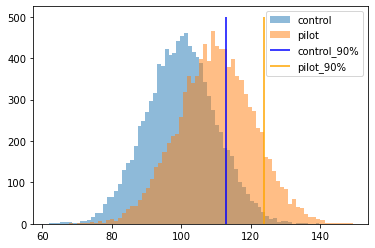

In [5]:
dist_control = norm.rvs(loc=100, scale=10, size=10000)
dist_pilot = (1 + 0.1) * norm.rvs(loc=100, scale=10, size=10000)

plt.hist(dist_control, bins=70, alpha=0.5, label='control')
plt.vlines(np.percentile(dist_control, 90), 0, 500, 'blue', label='control_90%')
plt.hist(dist_pilot, bins=70, alpha=0.5, label='pilot')
plt.vlines(np.percentile(dist_pilot, 90), 0, 500, 'orange', label='pilot_90%')
plt.legend()
plt.show()

In [ ]:
    'params': {'error': 0.4, 'effect': 10},
    'true_answer': 1    
},
{
    'params': {'error': 0.05, 'effect': 0.00000001},
    'true_answer': 30  
},

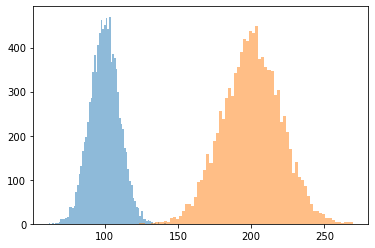

In [40]:
plt.hist(dist_a_one, bins=70, alpha=0.5, label='control')
plt.hist(dist_b, bins=70, alpha=0.5, label='pilot')
plt.show()

In [51]:
def get_ci_bootstrap_pivotal(boot_metrics: np.array, pe_metric: float, alpha: float=0.05):
    """Строит центральный доверительный интервал"""
    left = np.percentile(boot_metrics, 100*alpha/2)
    right = np.percentile(boot_metrics, 100*(1-alpha/2))
    return (2 * pe_metric - right, 2 * pe_metric - left)

effect = 1
sample_size = 1000

dist_a_one = norm.rvs(loc=100, scale=10, size=sample_size)
dist_a_two = norm.rvs(loc=100, scale=10, size=sample_size)
dist_b = (1 + effect) * norm.rvs(loc=100, scale=10, size=sample_size)

boot_metrics_a_one = np.percentile(np.random.choice(dist_a_one, size=(1000, sample_size)), 90, axis=1)
boot_metrics_a_two = np.percentile(np.random.choice(dist_a_two, size=(1000, sample_size)), 90, axis=1)
boot_metrics_b = np.percentile(np.random.choice(dist_b, size=(1000, sample_size)), 90, axis=1)

aa_diff = boot_metrics_a_one - boot_metrics_a_two
ab_diff = boot_metrics_a_one - boot_metrics_b
aa_pe_metric = np.percentile(dist_a_one, 90) - np.percentile(dist_a_two, 90)
ab_pe_metric = np.percentile(dist_a_one, 90) - np.percentile(dist_b, 90)

aa_bounds = []
ab_bounds = []
for _ in range(1000):
    aa_bounds.append(get_ci_bootstrap_pivotal(aa_diff, aa_pe_metric))
    ab_bounds.append(get_ci_bootstrap_pivotal(ab_diff, ab_pe_metric))

aa_res = 1 - int(aa_left_bound <= 0 <= aa_right_bound)
ab_res = 1 - int(ab_left_bound <= 0 <= ab_right_bound)

error_first = np.mean(result_aa)
error_second = 1 - np.mean(result_ab)

print(aa_res,  aa_left_bound, aa_right_bound)
print(ab_res, ab_left_bound, ab_right_bound)

0 -0.5314092315756075 0.5622551856984477
1 -113.82116801109204 -112.362798413557


In [57]:
get_ci_bootstrap_pivotal(aa_diff, aa_pe_metric)

(-0.5314092315756075, 0.5622551856984477)

In [58]:
aa_diff

array([ 2.11023176e-01,  1.86645366e-01, -1.38370479e-01,  4.17081984e-02,
       -2.24190425e-01, -1.92771697e-01,  1.65235463e-01, -1.72095587e-01,
        2.37673937e-01,  1.42648254e-01,  1.97032961e-01,  1.38649425e-01,
        1.95937616e-01, -8.43871073e-02, -1.43823615e-01,  5.15887858e-02,
        5.99625083e-01, -1.03707953e-01,  5.12515487e-02,  1.37939868e-02,
        5.26957230e-01, -2.73907926e-01,  2.51296898e-01, -1.53626924e-01,
        3.86465982e-02, -1.39253811e-01, -8.57071655e-02, -3.73193270e-01,
        4.47549382e-01,  6.04455304e-01, -8.60618153e-01,  2.73220585e-01,
        1.09161802e-01,  5.60489462e-01,  2.24818816e-01, -4.04017269e-01,
       -2.76889956e-02,  2.46963524e-01,  2.76212398e-01, -1.19021947e-01,
        2.41136521e-01, -1.52042627e-01, -2.79595481e-01,  1.62276901e-02,
       -1.04830655e-01, -3.51377950e-01,  1.24898349e-01,  1.43641497e-02,
        9.33241398e-01, -1.34084207e-01, -6.49579720e-02,  2.49832277e-01,
        7.31812953e-02, -

In [ ]:
tqd

In [ ]:
aresult_aa.append(check_ttest(a_one, a_two))
result_ab.append(check_ttest(a_one, b))
error_first = np.mean(result_aa)
error_second = 1 - np.mean(result_ab)

In [ ]:
В качестве метрики в эксперименте используется не среднее, а 90% квантиль.
Нулевая гипотеза - 90% квантили равны, альтернативная гипотеза - 90% квантили не равны.
Эксперимент будет оцениваться с помощью 1000 итераций бутстрепа и центрального доверительного интервала c уровнем
значимости alpha=0.05.

In [29]:
.shape

(1000,)

In [ ]:
    bootstrap_X = np.random.choice(sub_X, size=(size, B))
    bootstrap_skewness = stats.skew(bootstrap_X, axis=0)
    list_points.append(bootstrap_skewness)

alpha = 0.05

array_points = np.array(list_points)
bounds = np.quantile(array_points, [alpha/2, 1-alpha/2], axis=1)
means = np.mean(array_points, axis=1)